In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df= pd.read_csv('audible_uncleaned.csv')

In [269]:
df.head(5)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [271]:
print(df.size, df.shape)

699912 (87489, 8)


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [275]:
df.describe()

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


In [277]:
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [279]:
df.columns

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')

In [281]:
df[['written','author']] = df['author'].str.split(':',expand= True) 

In [283]:
df.head(4)

,name,author,narrator,time,releasedate,language,stars,price,written
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,Writtenby
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,Writtenby
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,Writtenby
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,Writtenby


In [285]:
df[['narrated_by','narrator']] = df['narrator'].str.split(':',expand= True) 

In [287]:
df.head(3)

,name,author,narrator,time,releasedate,language,stars,price,written,narrated_by
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,Writtenby,Narratedby
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,Writtenby,Narratedby
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,Writtenby,Narratedby


In [289]:
cols_to_drop = ['written','narrated_by']

In [291]:
df = df.drop(cols_to_drop , axis = 1)

In [293]:
df.head(1)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00


In [295]:
df.replace(to_replace="Geronimo Stilton #11 & #12",value="Geronimo Stilton")

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [297]:
df['stars'] = df['stars'].str.replace('4.5 out of 5 stars', '', regex=False)

In [299]:
df['stars'] = df['stars'].str.replace('5 out of 5 stars', '', regex=False)

In [301]:
df['stars'] = df['stars'].str.replace('4 out of 5 stars', '', regex=False)

In [303]:
df['stars'] = df['stars'].str.replace('3 out of 5 stars', '', regex=False)

In [305]:
df['stars'] = df['stars'].str.replace('2 out of 5 stars', '', regex=False)

In [307]:
df['stars'] = df['stars'].str.replace('1 out of 5 stars', '', regex=False)

In [309]:
df["stars"] = df["stars"].replace("Not rated yet", "NaN")

In [311]:
df.head(15)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,181 ratings,820.00
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslany,10 hrs and 35 mins,30-10-18,English,72 ratings,656.00
6,Quest for the Diamond Sword,WinterMorgan,LukeDaniels,2 hrs and 23 mins,25-11-14,English,11 ratings,233.00
7,The Dark Prophecy,RickRiordan,RobbieDaymond,12 hrs and 32 mins,02-05-17,English,50 ratings,820.00
8,Merlin Mission Collection,MaryPopeOsborne,MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 ratings,"1,256.00"
9,The Tyrant’s Tomb,RickRiordan,RobbieDaymond,13 hrs and 22 mins,24-09-19,English,58 ratings,820.00


In [313]:

df["releasedate"] = pd.to_datetime(df["releasedate"], format="%d-%m-%y")

In [315]:
def time_to_hours(time_str):
    hours = 0
    minutes = 0
    
    # Extract hours
    if "hrs" in time_str:
        hours = int(time_str.split(" hrs")[0])
    
    # Extract minutes
    if "mins" in time_str:
        minutes = int(time_str.split(" and ")[-1].split(" mins")[0])
    
    # Calculate total hours
    return hours + (minutes / 60)

# Apply function to the 'Time' column
df["time (hours)"] = df["time"].apply(time_to_hours)


In [317]:
df.head(2)

,name,author,narrator,time,releasedate,language,stars,price,time (hours)
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-08-04,English,34 ratings,468.00,2.333333
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-05-01,English,41 ratings,820.00,13.133333


In [327]:
df["stars"] = df["stars"].str.replace("ratings", '')

In [329]:
df.head(2)

,name,author,narrator,time,releasedate,language,stars,price,time (hours)
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-08-04,English,34,468.00,2.333333
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-05-01,English,41,820.00,13.133333


In [331]:
df= df.drop('time', axis=1)

In [333]:
df.columns

Index(['name', 'author', 'narrator', 'releasedate', 'language', 'stars',
       'price', 'time (hours)'],
      dtype='object')

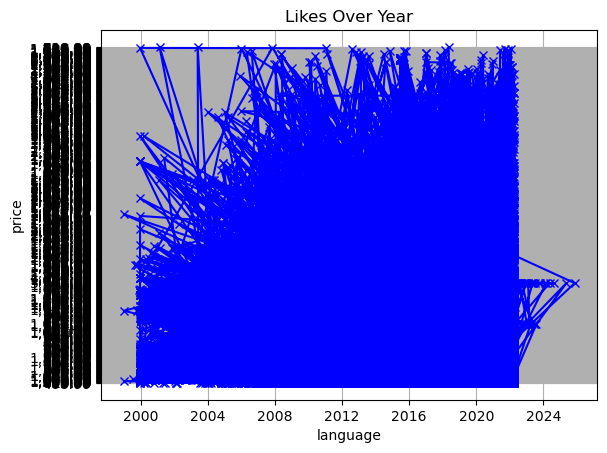

In [335]:
plt.plot(df['releasedate'], df['price'], marker='x', color='b')
plt.title('Likes Over Year')
plt.xlabel('language')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [245]:
df.columns

Index(['name', 'author', 'narrator', 'releasedate', 'language', 'stars',
       'price', 'time (hours)'],
      dtype='object')

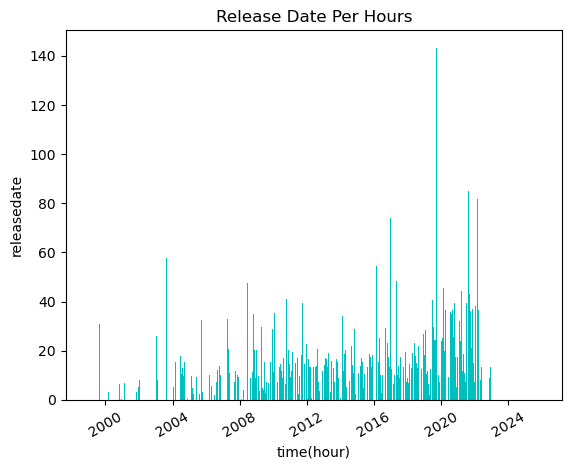

In [340]:
plt.bar(df['releasedate'], df['time (hours)'], color= 'c')
plt.title('Release Date Per Hours')
plt.xlabel('time(hour)')
plt.ylabel('releasedate')
plt.xticks(rotation=30)
plt.show()